# Importing libraries

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# Importing data

In [8]:
data = pd.read_csv("/content/sample_data/california_housing_train.csv")

In [9]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


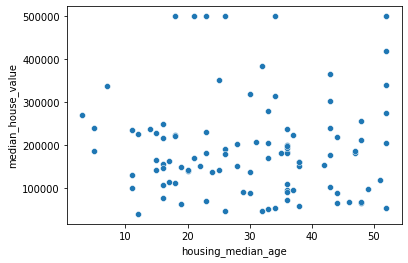

In [10]:
sns.scatterplot(data=data.sample(100), x="housing_median_age", y="median_house_value")

In [11]:
data.shape

(17000, 9)

# Hyperparameter tuning

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

In [16]:
X = data[["housing_median_age","median_income"]]
y = data["median_house_value"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [29]:
#dicionário que possui os hiperparametros que iremos testar
param_grid = {
    'max_depth': [80, 110], #profundidade das árvores
    'max_features': [2, 3], #quantas features serão consideradas na hora de buscar pelo melhor split
    'min_samples_leaf': [3, 5], #número mínimo de exemplos em cada nó
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300] #quantas árvores serão treinadas
}

In [30]:
#instanciando o modelo
model = RandomForestRegressor()

#instanciando o método para buscar pelos melhores hiperparâmetros
"""
  *estimator => o modelo que será utilizado
  *param_grid => o dicionário contendo os valores dos parâmetros que serão testados
  *cv => quantos folds no cross validation
"""
grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)

In [31]:
#'treina' o método para encontrar os melhores paramêtros
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [80, 110], 'max_features': [2, 3],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             verbose=2)

In [34]:
#vendo os melhores parâmetros 'descobertos'
grid_search.best_params_

{'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 100}

In [35]:
#retorna o melhor modelo, com os parâmetros descobertos
grid_search.best_estimator_

RandomForestRegressor(max_depth=80, max_features=2, min_samples_leaf=5,
                      min_samples_split=12)

# Hyperparameter tuning

# Multivariate Linear Regression

To make a Multivariate Linear Regression, we need only one feature and a independent variable.
Only looking throught the columns, I'll select the feature I believe that is the best to predict
the "median_house_value", which is "median_income", that represents the median income of
the population of a determined neighbor in California.

In [5]:
# spliting X (dependent variable) and Y (independent variable)
data = data.sample(100, random_state=42)
X = data[["housing_median_age","median_income"]]
y = data["median_house_value"]

What we want is to find the line that better fits these datapoints.

# Feature Scaling

Because we have two variables in different scales, it can turns the gradient descent algorithm slowly.
So, in order to gradient descent find a path to the minimum cost more directly and faster, we need to
scale the features. In this case, I'll use min-max scaler, which has the following formula:

<img src="https://i.stack.imgur.com/EuitP.png">


### Scaling for X

In [ ]:
X["median_income"] = X["median_income"].apply(lambda x: (x - min(X["median_income"]))/(max(X["median_income"]) - min(X["median_income"])))
X["housing_median_age"] = X["housing_median_age"].apply(lambda x: (x - min(X["housing_median_age"]))/(max(X["housing_median_age"]) - min(X["housing_median_age"])))

In [ ]:
X

,housing_median_age,median_income
14549,1.000000,0.510033
7840,0.250000,0.576452
7600,0.045455,0.232184
7309,0.840909,0.240456
10034,0.454545,0.339846
...,...,...
7971,0.272727,0.231224
7841,0.590909,0.414898
9635,0.590909,0.124575
2467,0.090909,0.329249


### Scaling for Y

In [ ]:
# getting max and min of the column y
y_min = min(y)
y_max = max(y)

In [ ]:
y = y.apply(lambda y: (y - y_min)/(y_max - y_min))
y.head(3)

14549    1.000000
7840     0.653042
7600     0.402173
Name: median_house_value, dtype: float64

# Implementation

### Model

In [ ]:
def h(x, w, b):
  return np.dot(w, x) + b

### Cost function

In [ ]:
def cost_function(x, w, b, y):
  x, y, w = np.array(x), np.array(y), np.array(w)
  m = len(x)
  sum = 0
  for i in range(m):
    prediction = h(x[i], w, b)
    real = y[i]
    sum += (prediction - real)**2

  return sum/(2*m)

In [ ]:
def derivative_cost_function(x, w, b, y, pos):
  x, y, w = np.array(x), np.array(y), np.array(w)
  m = len(x)
  sum = 0
  for i in range(m):
    prediction = h(x[i], w, b)
    real = y[i]
    sum += (prediction-real) * x[i][pos]

  return sum/m

In [ ]:
def derivative_cost_function_b(x, w, b, y):
  x, y, w = np.array(x), np.array(y), np.array(w)
  m = len(x)
  sum = 0
  for i in range(m):
    prediction = h(x[i], w, b)
    real = y[i]
    sum += (prediction-real)

  return sum/m

### Gradient Descent

In [ ]:
def gradient_descent(x, y, b=0, n_iterations=3000, learning_rate=0.1):
  w=[0]*(x.shape[1])
  x, y, w = np.array(x), np.array(y), np.array(w)
  j_history = []

  w_s = {}

  for _ in range(n_iterations):
    for i in range(len(w)):
      w_s[i] = w[i] - (learning_rate * derivative_cost_function(x, w, b, y, i))
    b = b - (learning_rate * derivative_cost_function_b(x, w, b, y))

    j_history.append(cost_function(x, w, b, y))

    w = list(w_s.values())

  return w, b, j_history

In [ ]:
w, b, j_history = gradient_descent(X, y)

In [ ]:
w, b

([0.29017193879369024, 1.0215929021074557], -0.022493906037500344)

In [ ]:
LinearRegression().fit(X, y).coef_ , LinearRegression().fit(X, y).intercept_

(array([0.29014696, 1.02287099]), -0.02280148271278476)

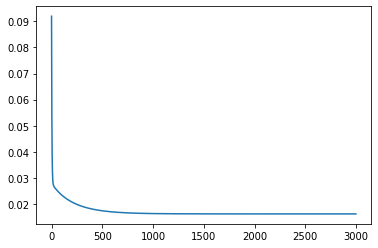

In [ ]:
plt.plot(j_history)